In [1]:
%reset

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../data/digit-recognizer/train.csv')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


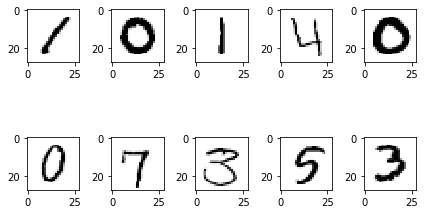

In [3]:
img_data = df.drop('label', axis=1, inplace=False).values

figure = plt.figure()
ax_arr = []

for n in range(10):
    ax_arr.append(figure.add_subplot(2, 5, n+1))
    ax_arr[n].imshow(img_data[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    
plt.tight_layout()
plt.show()

In [4]:
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화도 진행해요! => train_x_data, test_x_data에 대해서만 진행
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='auto', restore_best_weights=True)

model.fit(norm_train_x_data, train_t_data, epochs=5000, batch_size=100, validation_split=0.3, verbose=0,
          callbacks=[es])

In [6]:
result = model.evaluate(norm_test_x_data, test_t_data)
print(result)

394/394 [==============================] - 1s 2ms/step - loss: 0.2012 - accuracy: 0.9434
[0.20123730599880219, 0.943412721157074]
